In [1]:
# import necessary libraries and plotting functions

import os
from gausspyplus.spatial_fitting import SpatialFitting
from astropy.io import fits
import mplcyberpunk
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from pylab import cm
import vapeplot
from astropy.wcs import WCS
from astropy import units as u
from gausspyplus.plotting import get_points_for_colormap, shiftedColorMap
import gausspyplus.plotting as gplt

def get_cmap_rchi2(vmin, vmax):
    orig_cmap = matplotlib.cm.RdBu_r
    start, stop = get_points_for_colormap(vmin, vmax, central_val=1.)
    midpoint = (1 - vmin) / (vmax - vmin)
    return shiftedColorMap(orig_cmap, start=0., midpoint=midpoint, stop=stop)

plt.style.use("default")
def add_style(ax):
    ax.set_xlabel('Galactic Longitude')
    ax.set_ylabel('Galactic Latitude')


if not os.path.exists('decomposition_grs'):
    !mkdir decomposition_grs
    #run gaussina on s1&3
    #3d barolo
    
import itertools
import os
import pickle
import random
import sys

import numpy as np

import matplotlib
# matplotlib.use('PDF', warn=False)
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from astropy import units as u
from tqdm import tqdm

#from .utils.gaussian_functions import gaussian, combined_gaussian
#from .utils.spectral_cube_functions import get_spectral_axis, correct_header

In [5]:
def pickle_load_file(pathToFile):
    with open(os.path.join(pathToFile), "rb") as pickle_file:
        if (sys.version_info > (3, 0)):
            data = pickle.load(pickle_file, encoding='latin1')
        else:
            data = pickle.load(pickle_file)
    return data

In [2]:
import gausspyplus.config_file as cf
cf.make(all_keywords=True)

SAVED FILE: 'gausspy+.ini' in '/home/user/Documents/Masters/processing'


In [34]:
#  run the script
!python step_1-training_set--grs.py



invalid alternate code, keyword resembles SPECSYSa but isn't.

decompose 250 spectra ...
using 6 out of 8 cpus
100%|█████████████████████████████████████████| 250/250 [00:52<00:00,  4.74it/s]
SUCCESS


SAVED FILE: 'pbcorr_J1059_09_HI.image_S1237-training_set_250_spectra.pickle' in 'decomposition_S1237/gpy_training'

Plotting...


100%|███████████████████████████████████████████| 20/20 [00:12<00:00,  1.63it/s]

SAVED FILE: 'pbcorr_J1059_09_HI.image_S1237-training_set_250_spectra_plots.pdf' in 'decomposition_S1237/gpy_training'


In [36]:
#  run the script
!python step_2-train--grs.py 


GaussPy training
Using training set: decomposition_S1237/gpy_training/pbcorr_J1059_09_HI.image_S1237-training_set_250_spectra.pickle
Training...



1.59, 0.9, -0.13567671828025296, 0.0
iter 0: F1=41.9%, alpha=[1.59, 1.7], p=[0.00, 0.00]  (Convergence testing begins in 20 iterations)

1.7121090464522277, 0.9, -0.12579312488420902, 0.09768723716178213
iter 1: F1=43.3%, alpha=[1.71, 1.79], p=[0.10, 0.07]  (Convergence testing begins in 19 iterations)

1.923010096009798, 0.9, 0.14022502943304938, 0.16872083964605622
iter 2: F1=43.1%, alpha=[1.92, 1.94], p=[0.17, 0.12]  (Convergence testing begins in 18 iterations)

1.9655284091661098, 0.9, 0.22035542785364304, 0.03401465052504946
iter 3: F1=43.2%, alpha=[1.97, 2.07], p=[0.03, 0.10]  (Convergence testing begins in 17 iterations)

1.8012231746228804, 0.9, -0.06182815351046189, -0.13144418763458354
iter 4: F1=44.1%, alpha=[1.8, 2.19], p=[-0.13, 0.10]  (Convergence testing begins in 16 iterations)

1.7254243251477126, 0.9, -0.1072679969150474

In [37]:
#  run the script
!python step_3-prepare--grs.py



invalid alternate code, keyword resembles SPECSYSa but isn't.


calculating average rms from data...
100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1978.76it/s]
>> calculated rms value of 0.000 from data

GaussPy preparation

preparing GaussPy cube...
Using 6 of 8 cpus
100%|█████████████████████████████████████| 50.0k/50.0k [00:23<00:00, 2.09kit/s]
49997it [00:00, 311074.25it/s]
SUCCESS

50000it [00:00, 86173.72it/s]

pickle dump dictionary...
For GaussPyDecompose: 'path_to_pickle_file' = 'decomposition_S1237/gpy_prepared/pbcorr_J1059_09_HI.image_S1237.pickle'

SAVED FILE: 'pbcorr_J1059_09_HI.image_S1237_noise_map.fits' in 'decomposition_S1237/gpy_maps'

Plotting...


100%|█████████████████████████████████████████| 121/121 [00:13<00:00,  8.86it/s]

SAVED FILE: 'pbcorr_J1059_09_HI.image_S1237_plots.pdf' in 'decomposition_S1237/gpy_plots'


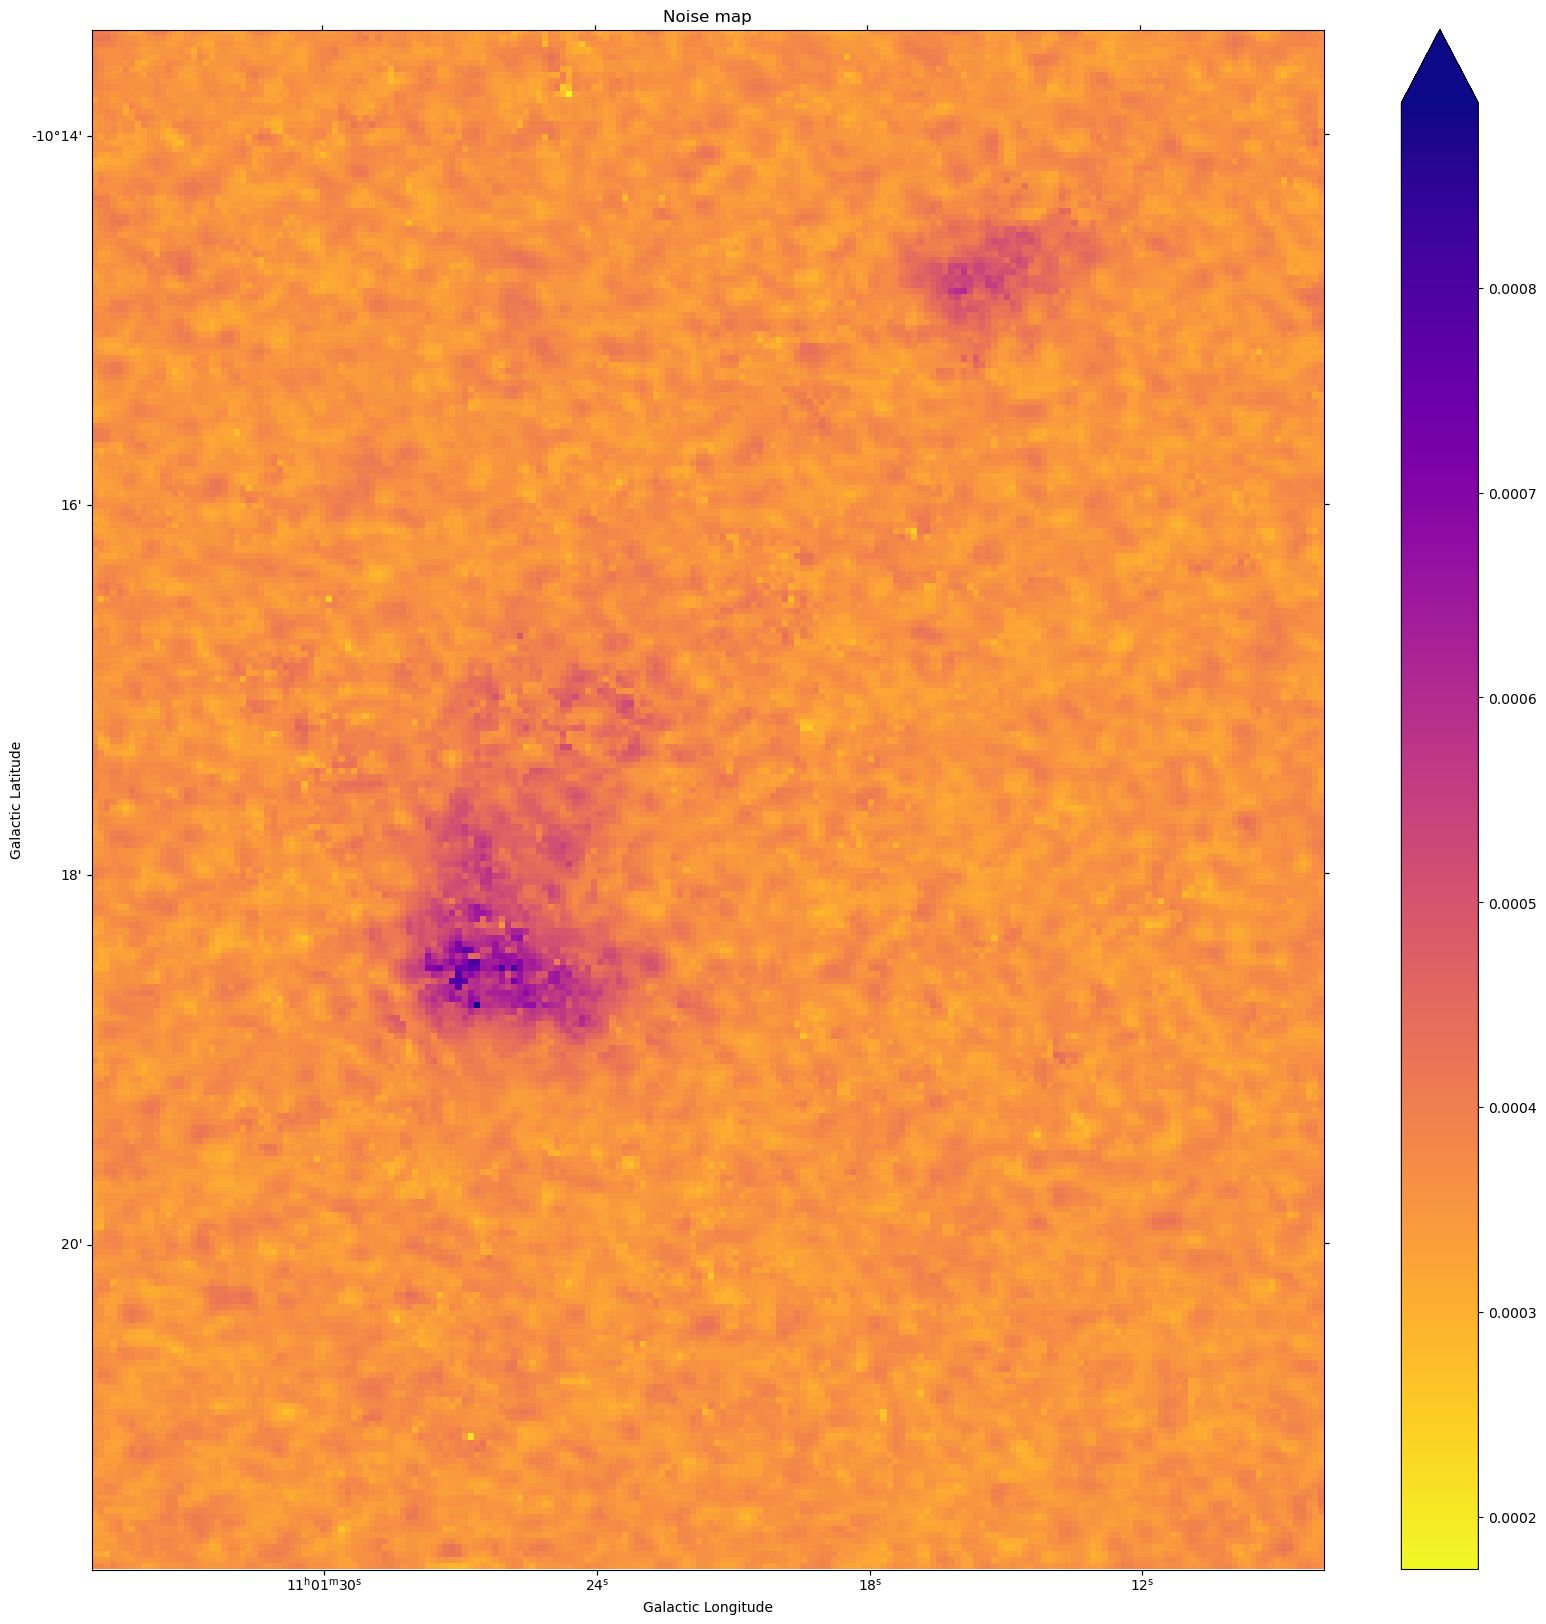

In [39]:
filepath = os.path.join('decomposition_S1237', 'gpy_maps', 'pbcorr_J1059_09_HI.image_S1237_noise_map.fits')
noise = fits.getdata(filepath)
wcs = WCS(fits.getheader(filepath))

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(projection=wcs))

img_noise = ax.imshow(noise, cmap='plasma_r')
fig.colorbar(img_noise, ax=ax, extend='max')
ax.set_title('Noise map')
add_style(ax)

plt.show()

In [40]:
#  run the script
!python step_4-decompose--grs.py




pickle load 'pbcorr_J1059_09_HI.image_S1237.pickle'...



invalid alternate code, keyword resembles SPECSYSa but isn't.


GaussPy decomposition

decomposition settings:
GaussPy:
Two phase decomposition: True
alpha1: 2.58
alpha2: 5.14
SNR1: 2.0
SNR2: 2.0

improve_fitting: True
min_fwhm: 1.0
max_fwhm: None
snr: 2.0
snr_fit: 1.0
significance: 3.0
snr_negative: 2.0
rchi2_limit: None
max_amp_factor: 1.1
neg_res_peak: True
broad: False
blended: False
fwhm_factor: 2.0
separation_factor: 0.08493218
exclude_means_outside_channel_range: True
min_pvalue: 0.01
max_ncomps: None

decomposing data...
using 6 out of 8 cpus
100%|██████████████████████████████████████| 50.0k/50.0k [18:58<00:00, 43.9it/s]
49999it [00:00, 207590.26it/s]

pickle dump GaussPy final results...
SAVED FILE: 'pbcorr_J1059_09_HI.image_S1237_g+_fit_fin.pickle' in 'decomposition_S1237/gpy_decomposed'

making component map...
SAVED FILE: 'pbcorr_J1059_09_HI.image_S1237_g+_component_map.fits' in 'decomposition_S1237/gpy_maps'

ma

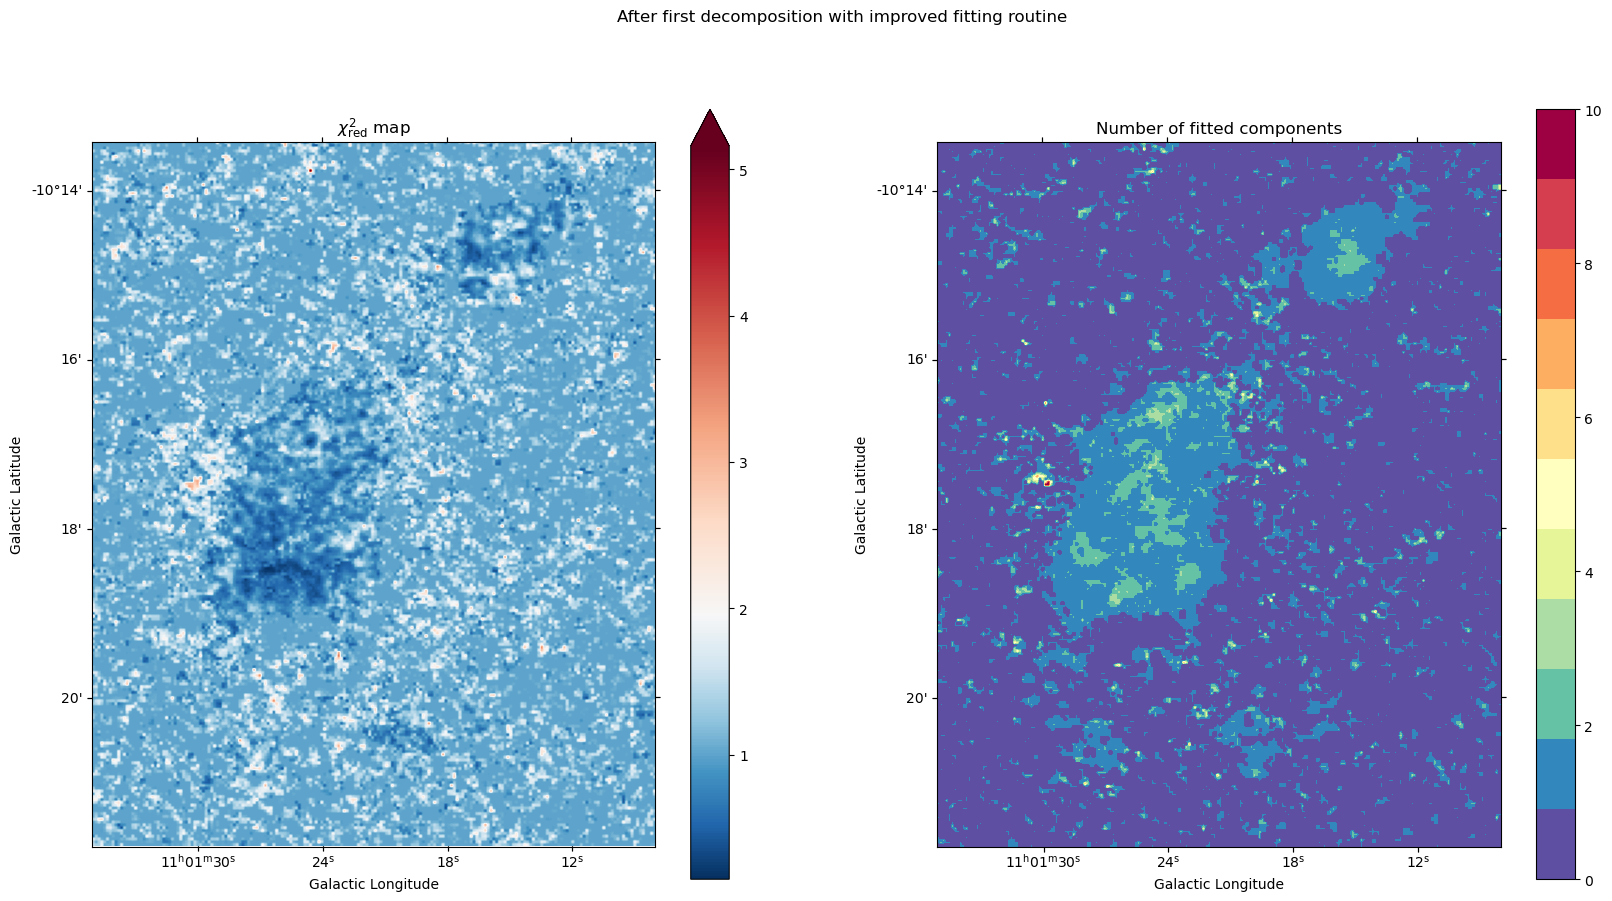

In [4]:
filepath = os.path.join('decomposition_S1237', 'gpy_maps', 'pbcorr_J1059_09_HI.image_S1237_g+_rchi2_map.fits')
rchi2 = fits.getdata(filepath)
wcs = WCS(fits.getheader(filepath))

fig, axes = plt.subplots(ncols=2, figsize=(20,10), subplot_kw=dict(projection=wcs))

ax = axes.flatten()[0]

vmin = min(rchi2.flatten())
vmax = 2.5
new_cmap = get_cmap_rchi2(vmin, vmax)

img_rchi2 = ax.imshow(rchi2, cmap=new_cmap)
fig.colorbar(img_rchi2, ax=ax, extend='max')
ax.set_title('$\chi_{\mathrm{red}}^{2}$ map')
add_style(ax)

ax = axes.flatten()[1]

ncomps = fits.getdata(os.path.join(
    'decomposition_S1237', 'gpy_maps', 'pbcorr_J1059_09_HI.image_S1237_g+_component_map.fits'))

vmax = 10
new_cmap = cm.get_cmap('Spectral_r', vmax + 1)

img_ncomps = ax.imshow(ncomps, cmap=new_cmap)
fig.colorbar(img_ncomps, ax=ax)
ax.set_title('Number of fitted components')
add_style(ax)

fig.suptitle('After first decomposition with improved fitting routine')

plt.show()

In [44]:
#  run the script
!python step_5-spatial_refitting-p1--grs.py


Spatial refitting - Phase 1

Flagging:
 - Blended components: True
 - Negative residual features: True
 - Broad components: True
   flagged if FWHM of broadest component in spectrum is:
   >= 2.0 times the FWHM of second broadest component
   or
   >= 2.0 times any FWHM in >= 50% of its neigbors
 - High reduced chi2 values (> None): False
 - Non-Gaussian distributed residuals: False
 - Differing number of components: True

For phase 1:
Exclude flagged spectra as possible refit solutions in first refit attempts: False
Use also flagged spectra as refit solutions in case no new best fit could be obtained from unflagged spectra: False

Refitting:
 - Blended components: True
 - Negative residual features: True
 - Broad components: False
   try to refit if FWHM of broadest component in spectrum is:
   >= 2.0 times the FWHM of second broadest component
   or
   >= 2.0 times any FWHM in >= 50% of its neigbors
 - High reduced chi2 values (> None): False
 - Non-Gaussian distributed residuals: F

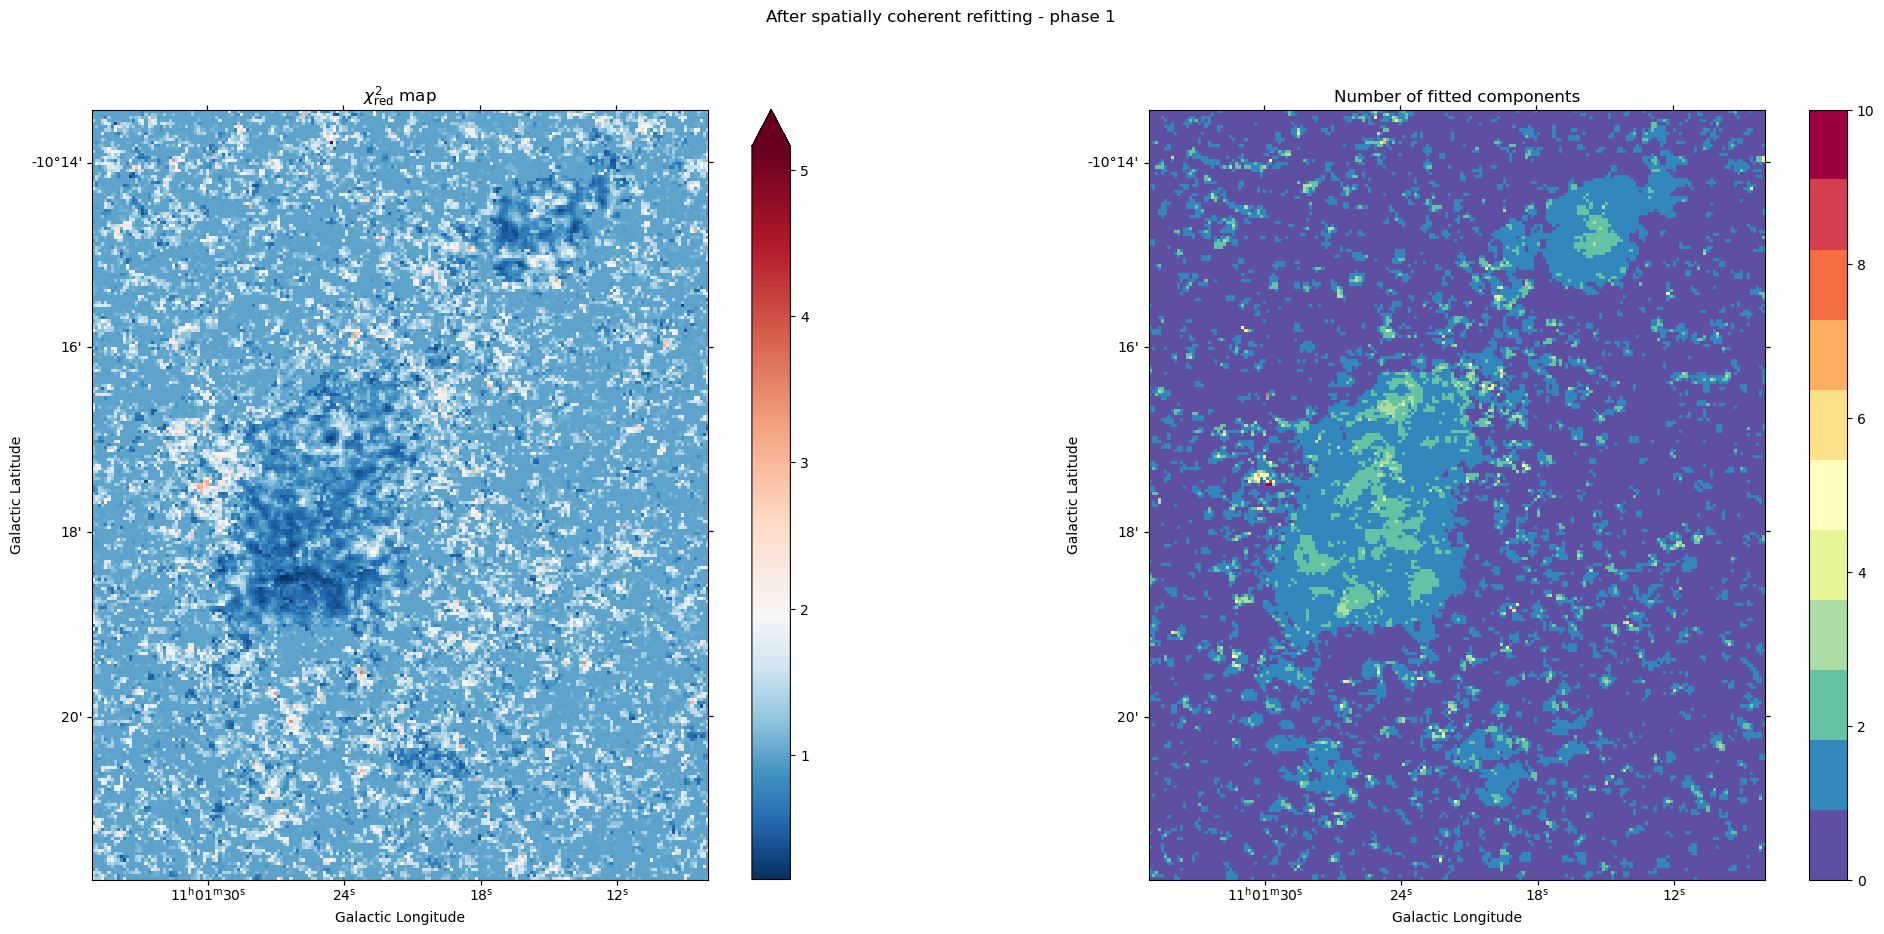

In [5]:
filepath = os.path.join(
    'decomposition_S1237', 'gpy_maps', 'pbcorr_J1059_09_HI.image_S1237_g+_fit_fin_sf-p1_rchi2_map.fits')
rchi2 = fits.getdata(filepath)
header = fits.getheader(filepath)
wcs = WCS(header)

fig, axes = plt.subplots(ncols=2, figsize=(25, 10), subplot_kw=dict(projection=wcs))

ax = axes.flatten()[0]

vmin = min(rchi2.flatten())
vmax = 2.5
new_cmap = get_cmap_rchi2(vmin, vmax)

img_rchi2 = ax.imshow(rchi2, cmap=new_cmap)
fig.colorbar(img_rchi2, ax=ax, extend='max')
ax.set_title('$\chi_{\mathrm{red}}^{2}$ map')
add_style(ax)

ax = axes.flatten()[1]

ncomps = fits.getdata(os.path.join(
    'decomposition_S1237', 'gpy_maps', 'pbcorr_J1059_09_HI.image_S1237_g+_fit_fin_sf-p1_component_map.fits'))

vmax = 10
new_cmap = cm.get_cmap('Spectral_r', vmax + 1)

img_ncomps = ax.imshow(ncomps, cmap=new_cmap)
fig.colorbar(img_ncomps, ax=ax)
ax.set_title('Number of fitted components')
add_style(ax)

fig.suptitle('After spatially coherent refitting - phase 1')

plt.show()

In [46]:
#  run the script
!python step_6-spatial_refitting-p2--grs.py


Spatial refitting - Phase 1

Flagging:
 - Blended components: True
 - Negative residual features: True
 - Broad components: True
   flagged if FWHM of broadest component in spectrum is:
   >= 2.0 times the FWHM of second broadest component
   or
   >= 2.0 times any FWHM in >= 50% of its neigbors
 - High reduced chi2 values (> None): False
 - Non-Gaussian distributed residuals: True
 - Differing number of components: True

For phase 1:
Exclude flagged spectra as possible refit solutions in first refit attempts: False
Use also flagged spectra as refit solutions in case no new best fit could be obtained from unflagged spectra: False

Refitting:
 - Blended components: False
 - Negative residual features: True
 - Broad components: False
   try to refit if FWHM of broadest component in spectrum is:
   >= 2.0 times the FWHM of second broadest component
   or
   >= 2.0 times any FWHM in >= 50% of its neigbors
 - High reduced chi2 values (> None): False
 - Non-Gaussian distributed residuals: T

In [6]:
filepath = os.path.join(
    'decomposition_S1237', 'gpy_maps', 'pbcorr_J1059_09_HI.image_S1237_g+_fit_fin_sf-p2_rchi2_map.fits')
rchi2 = fits.getdata(filepath)
wcs = WCS(fits.getheader(filepath))

fig, axes = plt.subplots(ncols=2, figsize=(25, 10), subplot_kw=dict(projection=wcs))

ax = axes.flatten()[0]

vmin = min(rchi2.flatten())
vmax = 2.5
new_cmap = get_cmap_rchi2(vmin, vmax)

img_rchi2 = ax.imshow(rchi2, cmap=new_cmap)
fig.colorbar(img_rchi2, ax=ax, extend='max')
ax.set_title('$\chi_{\mathrm{red}}^{2}$ map')
add_style(ax)

ax = axes.flatten()[1]

ncomps = fits.getdata(os.path.join(
    'decomposition_S1237', 'gpy_maps', 'pbcorr_J1059_09_HI.image_S1237_g+_fit_fin_sf-p2_component_map.fits'))

vmax = 10
new_cmap = cm.get_cmap('Spectral_r', vmax + 1)

img_ncomps = ax.imshow(ncomps, cmap=new_cmap)
fig.colorbar(img_ncomps, ax=ax)
ax.set_title('Number of fitted components')
add_style(ax)

fig.suptitle('After spatially coherent refitting - phase 2')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'decomposition_S1237/gpy_maps/pbcorr_J1059_09_HI.image_S1237_g+_fit_fin_sf-p2_rchi2_map.fits'

In [48]:
#  run the script
!python step_7-finalize--grs.py




invalid alternate code, keyword resembles SPECSYSa but isn't.


check which spectra require refitting...

determine neighbors for all spectra...
50000it [00:42, 1175.90it/s]

start refit iteration #1...
Using 6 of 8 cpus
100%|█████████████████████████████████████| 50.0k/50.0k [00:26<00:00, 1.87kit/s]
49997it [00:00, 290861.78it/s]
SUCCESS
Using 6 of 8 cpus
100%|█████████████████████████████████████| 50.0k/50.0k [00:12<00:00, 4.14kit/s]
49997it [00:00, 269398.67it/s]
SAVED FILE: 'pbcorr_J1059_09_HI.image_S1237_g+_fit_fin_sf-p2_finalized.dat' in 'decomposition_S1237/gpy_decomposed'


In [2]:
#  run the script
!python example_fits_first_component--grs.py




invalid alternate code, keyword resembles SPECSYSa but isn't.



In [50]:
def pickle_load(path_to_file, binary=True, encoding='latin1'):
    import pickle
    read = 'r'
    if binary:
        read = 'rb'
    with open(path_to_file, read) as pickled_file:
        pickled_data = pickle.load(pickled_file, encoding=encoding)
    return pickled_data


In [51]:
data = pickle_load(
    os.path.join('decomposition_S1237', 'gpy_prepared', 'pbcorr_J1059_09_HI.image_S1237.pickle'))

decomp = pickle_load(
    os.path.join('decomposition_S1237', 'gpy_decomposed', 'pbcorr_J1059_09_HI.image_S1237_g+_fit_fin_sf-p2.pickle'))

In [52]:
from gausspyplus.spatial_fitting import SpatialFitting
import gausspyplus.plotting as gplt

In [53]:

sp = SpatialFitting(config_file='gausspy+.ini')

    #  The following lines will override the corresponding parameter settings defined in 'gausspy+.ini'.

    #  filepath to the pickled dictionary of the prepared data
sp.path_to_pickle_file = os.path.join('decomposition_S1237', 'gpy_prepared', 'pbcorr_J1059_09_HI.image_S1237.pickle')
path_to_pickled_file = sp.path_to_pickle_file
path_to_decomp_pickle = os.path.join(
        'decomposition_S1237', 'gpy_decomposed',
        'pbcorr_J1059_09_HI.image_S1237_g+_fit_fin_sf-p2.pickle')
print(path_to_pickled_file)
    #  Here we select a subregion of the data cube, whose spectra we want to plot.
pixel_range =   {'x': [58,58], 'y': [60,60]}
plot_spectra_no_save_2(path_to_pickled_file,path_to_decomp_pickle=path_to_decomp_pickle, signal_ranges=True, pixel_range=pixel_range)


decomposition_S1237/gpy_prepared/pbcorr_J1059_09_HI.image_S1237.pickle


NameError: name 'plot_spectra_no_save_2' is not defined

In [17]:
gplt.plot_spectra(path_to_pickled_file,
                 path_to_decomp_pickle=path_to_decomp_pickle,
                 signal_ranges=True, pixel_range=pixel_range)


Plotting...





invalid alternate code, keyword resembles SPECSYSa but isn't.

100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]


SAVED FILE: 'pbcorr_J1059_09_HI.image_S3_g+_fit_fin_sf-p2_plots.pdf' in 'decomposition_S3/gpy_decomposed'


In [71]:
data = pickle_load_file(path_to_decomp_pickle)
print(data.keys())

dict_keys(['index_fit', 'best_fit_rchi2', 'best_fit_aicc', 'pvalue', 'amplitudes_fit', 'amplitudes_fit_err', 'fwhms_fit', 'fwhms_fit_err', 'means_fit', 'means_fit_err', 'log_gplus', 'N_neg_res_peak', 'N_blended', 'N_components', 'quality_control', 'gausspy_settings', 'improve_fit_settings', 'refit_iteration', 'gaussians_rchi2', 'gaussians_aicc'])
